In [1]:
import pyBigWig
import pandas as pd
import sys
sys.path.append('/home/hsher/rbp-maps/maps/')
from density.ReadDensity import ReadDensity
import os
from waveform import *
from pybedtools import BedTool
import matplotlib.pyplot as plt

In [2]:
basedir = '/home/hsher/seqdata/eclip_raw/'
neg = basedir + 'ENCFF891BFD.bigWig'
pos = basedir + 'ENCFF930WRN.bigWig'
bam = basedir + 'ENCFF162FHQ.bam'
HNRNPC = ReadDensity(pos, neg, bam = bam, name = 'HNRNPC')


In [3]:
neg = basedir + 'ENCFF494CVZ.bigWig'
pos = basedir + 'ENCFF078NBU.bigWig'
bam = basedir + 'ENCFF553XCL.bam'
HNRNPK = ReadDensity(pos, neg, bam = bam, name = 'HNRNPK')

In [4]:
neg = basedir + 'ENCFF766RBQ.bigWig'
pos = basedir + 'ENCFF984MNA.bigWig'
bam = basedir + 'ENCFF959SXJ.bam'
RPS3 = ReadDensity(pos, neg, bam = bam, name = 'RPS3')

In [5]:
neg = basedir + 'ENCFF376NMQ.bigWig'
pos = basedir + 'ENCFF142OTS.bigWig'
bam = basedir + 'ENCFF896PKL.bam'
RPS11 = ReadDensity(pos, neg, bam = bam, name = 'RPS11')

# Length distribution of key transcript

In [6]:
def length(good):
    return [int(g.stop)-(g.start) for g in good]

(array([5.518e+03, 8.310e+02, 1.490e+02, 5.700e+01, 1.100e+01, 8.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([3.010000e+02, 5.254160e+04, 1.047822e+05, 1.570228e+05,
        2.092634e+05, 2.615040e+05, 3.137446e+05, 3.659852e+05,
        4.182258e+05, 4.704664e+05, 5.227070e+05]),
 <a list of 10 Patch objects>)

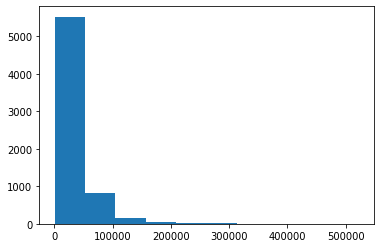

In [7]:
key_transcript_hnrnpc = BedTool('/home/hsher/projects/HNRNPC.key_transcript')
key_transcript_hnrnpc = key_transcript_hnrnpc.merge(c = '3,6,7', o = 'distinct', s=True)
plt.hist(length(key_transcript_hnrnpc))
#good = filter_key_transcript(key_transcript, HNRNPK)

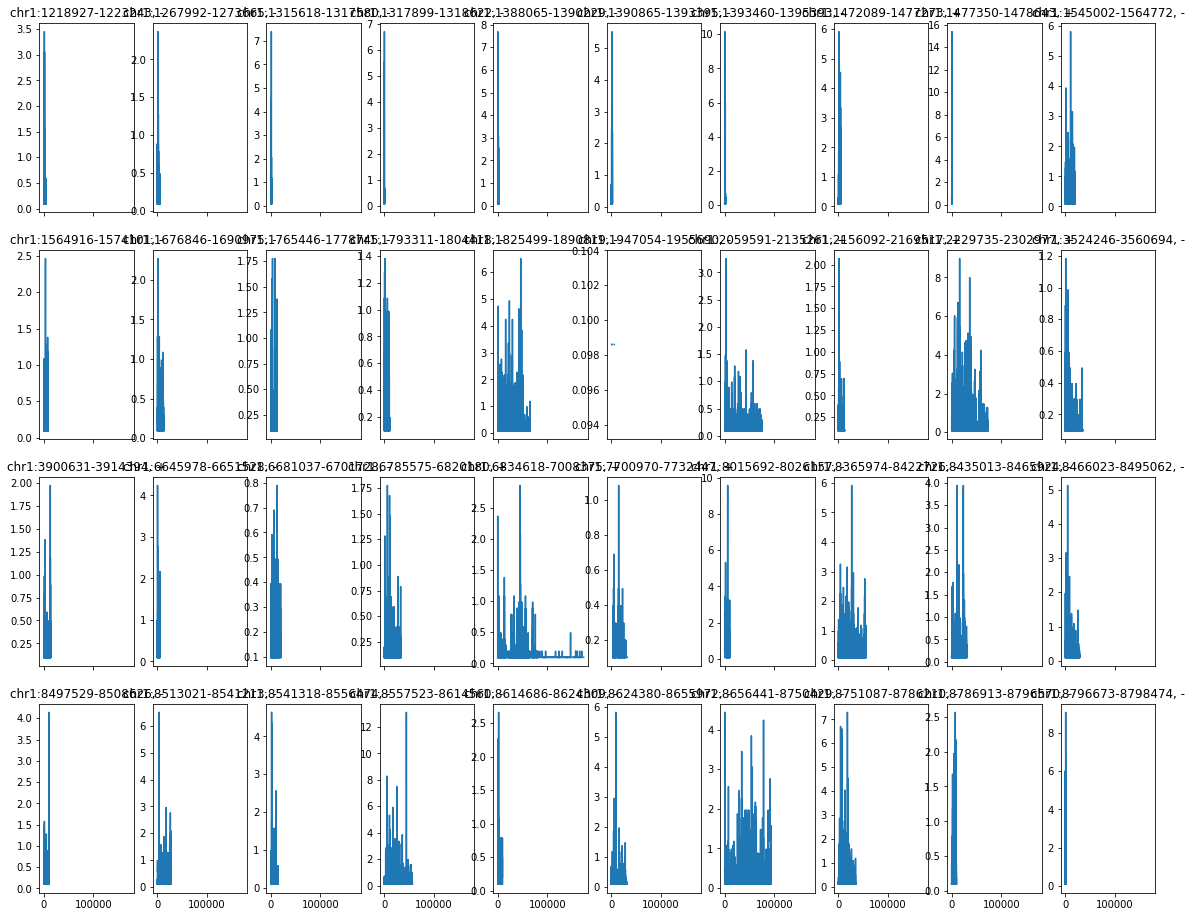

In [8]:
plot_waveform(key_transcript_hnrnpc, HNRNPC)

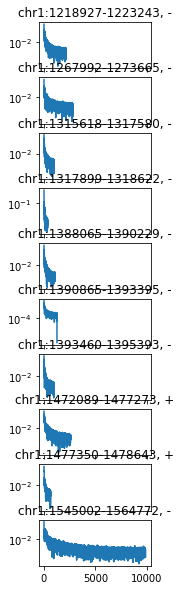

In [9]:
plot_spectral(key_transcript_hnrnpc, HNRNPC)

chr1 1218927 1223243 -
chr1 1267992 1273665 -
chr1 1315618 1317580 -
chr1 1317899 1318622 -
chr1 1388065 1390229 -
chr1 1390865 1393395 -
chr1 1393460 1395393 -
chr1 1472089 1477273 +
chr1 1477350 1478643 +
chr1 1545002 1564772 -


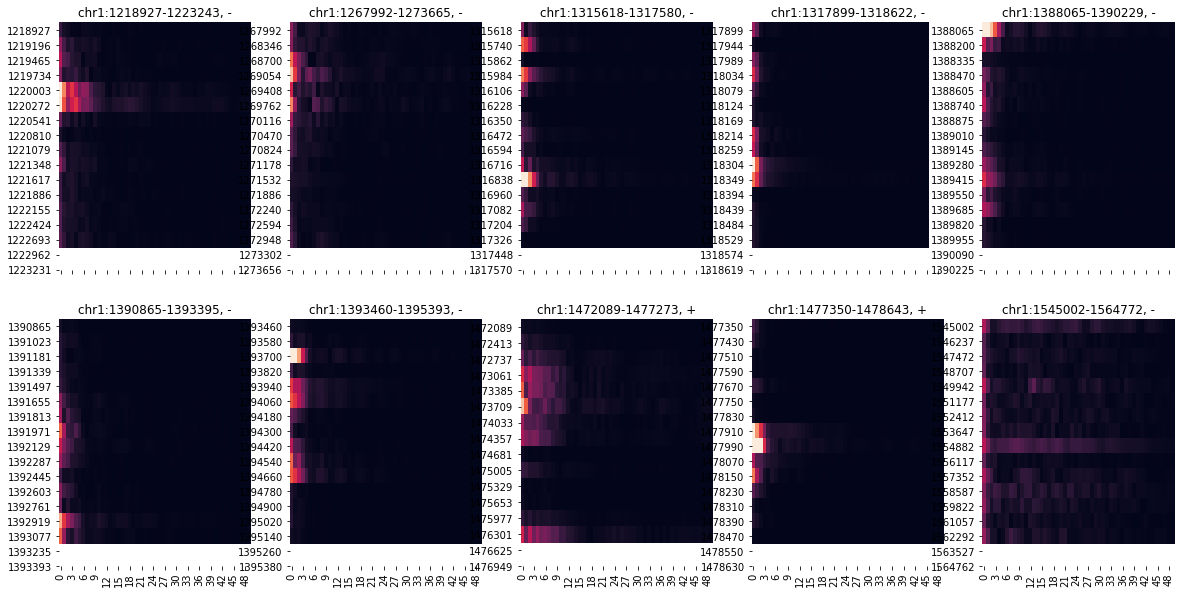

In [10]:
plot_spectrogram(key_transcript_hnrnpc, HNRNPC)

In [23]:
def get_spectrogram_unrolled(key_transcript, read_density):
    all_spect = []
    ids = []
    if len(key_transcript) < 5000:
        sample = len(key_transcript)
    else:
        sample = 5000
    for i in range(sample):
        chro = key_transcript[i].chrom
        start = int(key_transcript[i].start)
        end = int(key_transcript[i].stop)
        strand = key_transcript[i].strand
    
        shape = read_density.values(chro, start, end, strand)
        if np.nansum(shape) != 0:
        
            #print(chro, start, end, strand)
            if strand == '-':
                shape = [-s for s in shape]
            spect = spectrogram(shape, step = 'relative')
            all_spect.append(spect)
            ids.append((chro, start, end, strand))
            i+= 1
        else:
            i+= 1
    return all_spect, ids

In [18]:
all_hnrnpc, id_hnrnpc = get_spectrogram_unrolled(key_transcript_hnrnpc, HNRNPC)

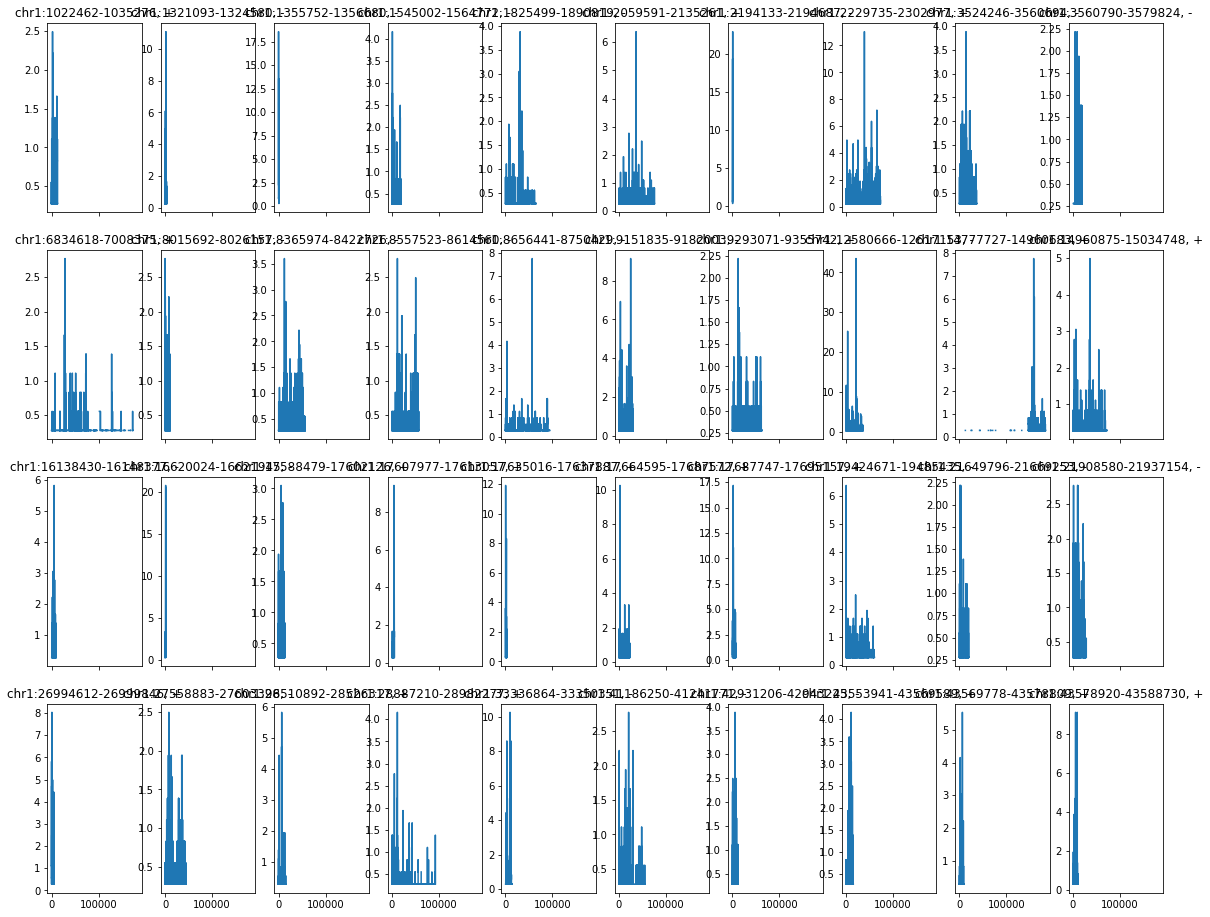

In [19]:
key_transcript_hnrnpk = BedTool('/home/hsher/projects/HNRNPK.key_transcript')
plot_waveform(key_transcript_hnrnpk, HNRNPK)

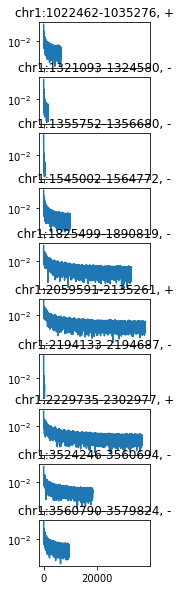

In [20]:
plot_spectral(key_transcript_hnrnpk, HNRNPK)

chr1 1022462 1035276 +
chr1 1321093 1324580 -
chr1 1355752 1356680 -
chr1 1545002 1564772 -
chr1 1825499 1890819 -
chr1 2059591 2135261 +
chr1 2194133 2194687 -
chr1 2229735 2302977 +
chr1 3524246 3560694 -
chr1 3560790 3579824 -


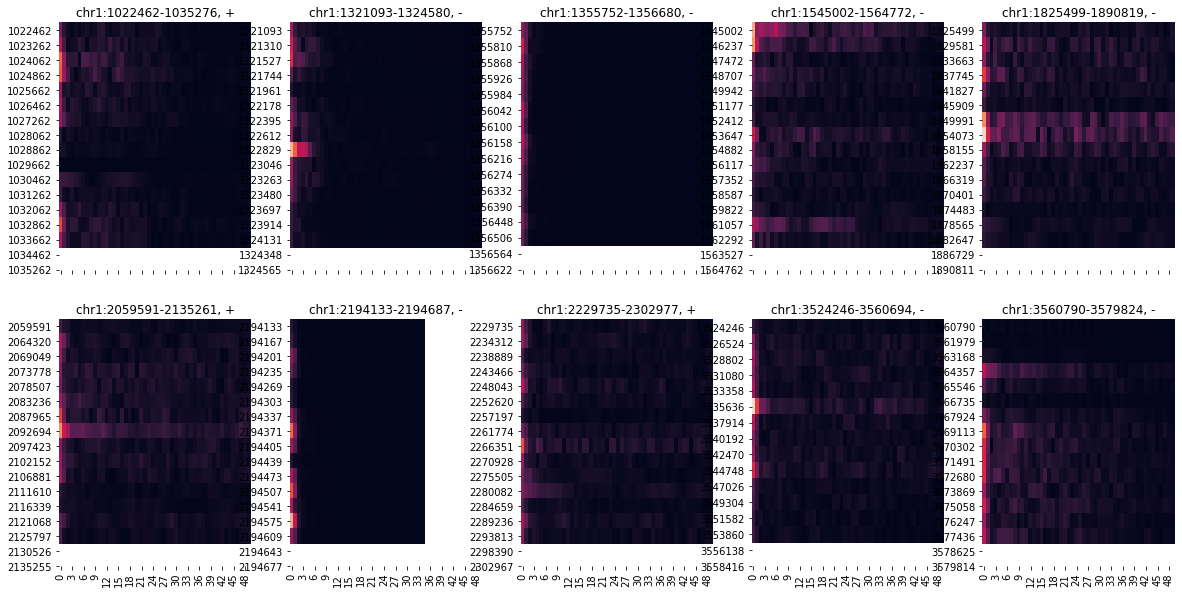

In [21]:
plot_spectrogram(key_transcript_hnrnpk, HNRNPK)

In [24]:
all_hnrnpk, id_hnrnpk = get_spectrogram_unrolled(key_transcript_hnrnpk, HNRNPK)

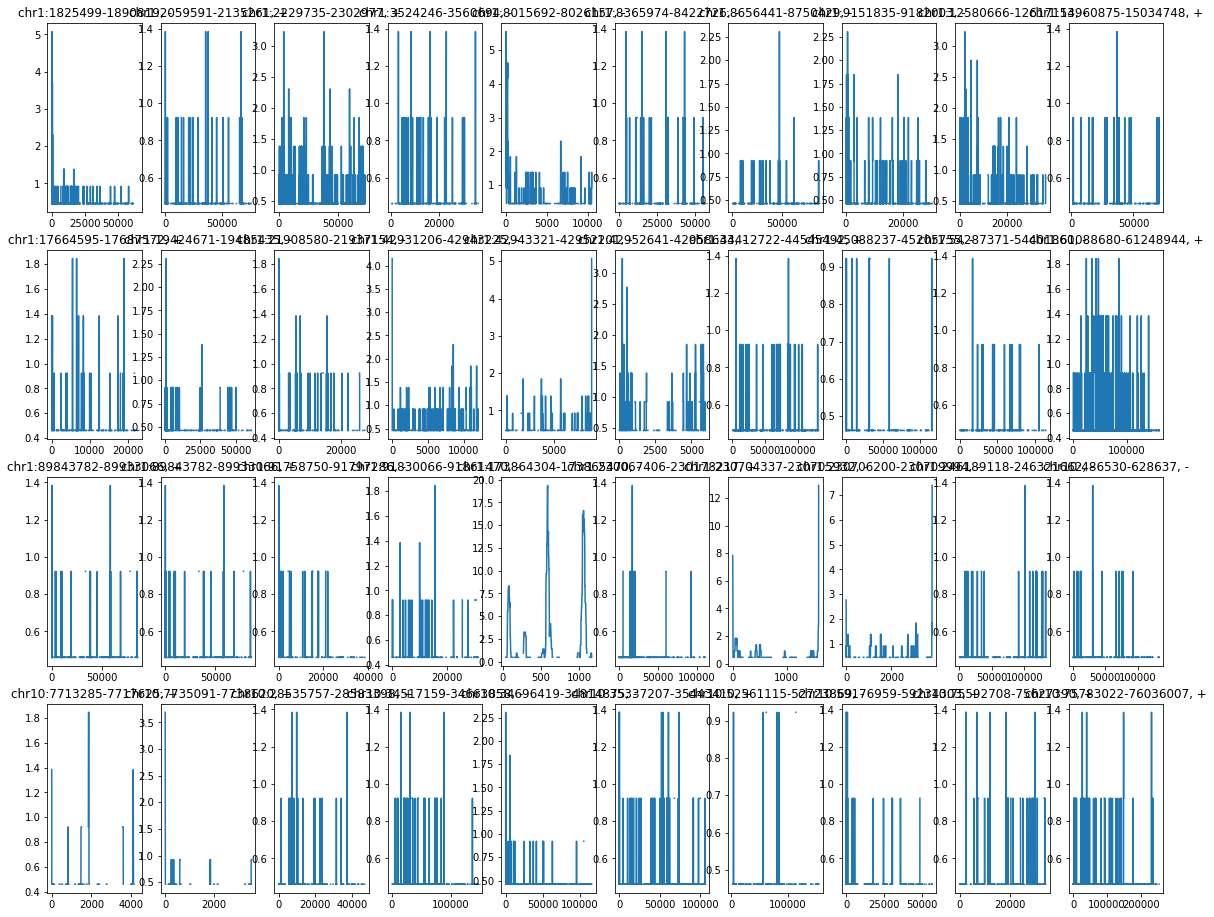

In [25]:
key_transcript_rps3 = BedTool('/home/hsher/projects/RPS3.key_transcript')
plot_waveform(key_transcript_rps3, RPS3, sharex = False)

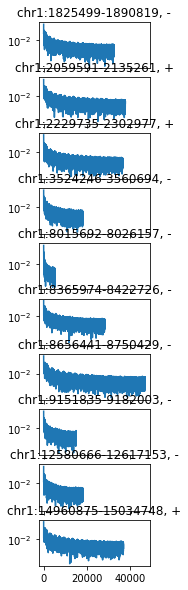

In [26]:
plot_spectral(key_transcript_rps3, RPS3)

chr1 1825499 1890819 -
chr1 2059591 2135261 +
chr1 2229735 2302977 +
chr1 3524246 3560694 -
chr1 8015692 8026157 -
chr1 8365974 8422726 -
chr1 8656441 8750429 -
chr1 9151835 9182003 -
chr1 12580666 12617153 -
chr1 14960875 15034748 +


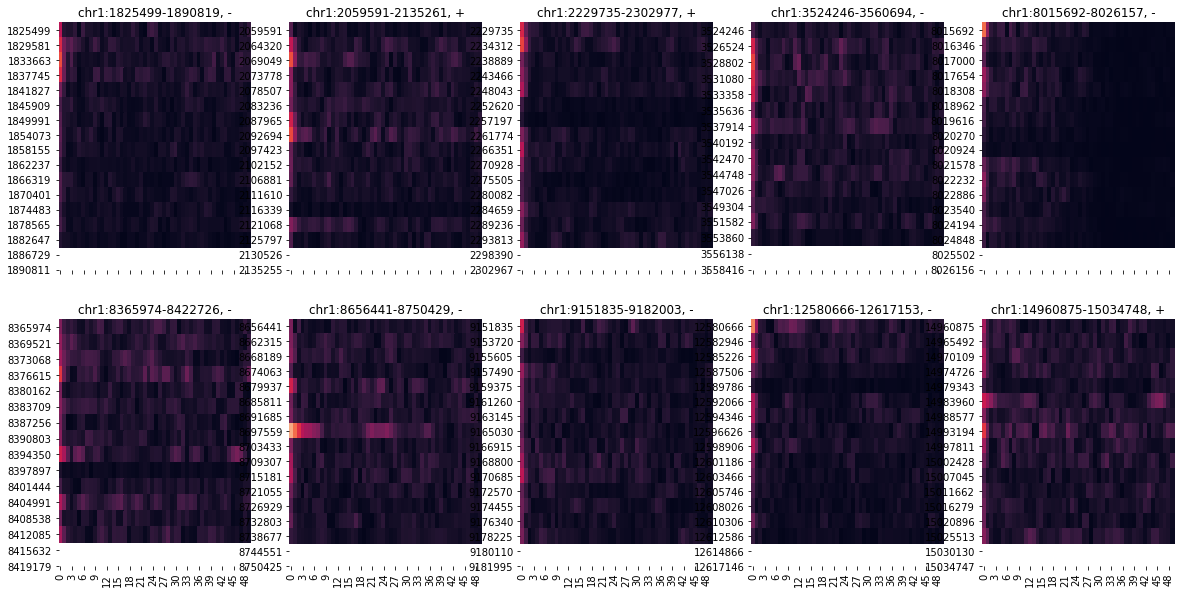

In [27]:
plot_spectrogram(key_transcript_rps3, RPS3)

In [28]:
all_rps3, id_rps3 = get_spectrogram_unrolled(key_transcript_rps3, RPS3)

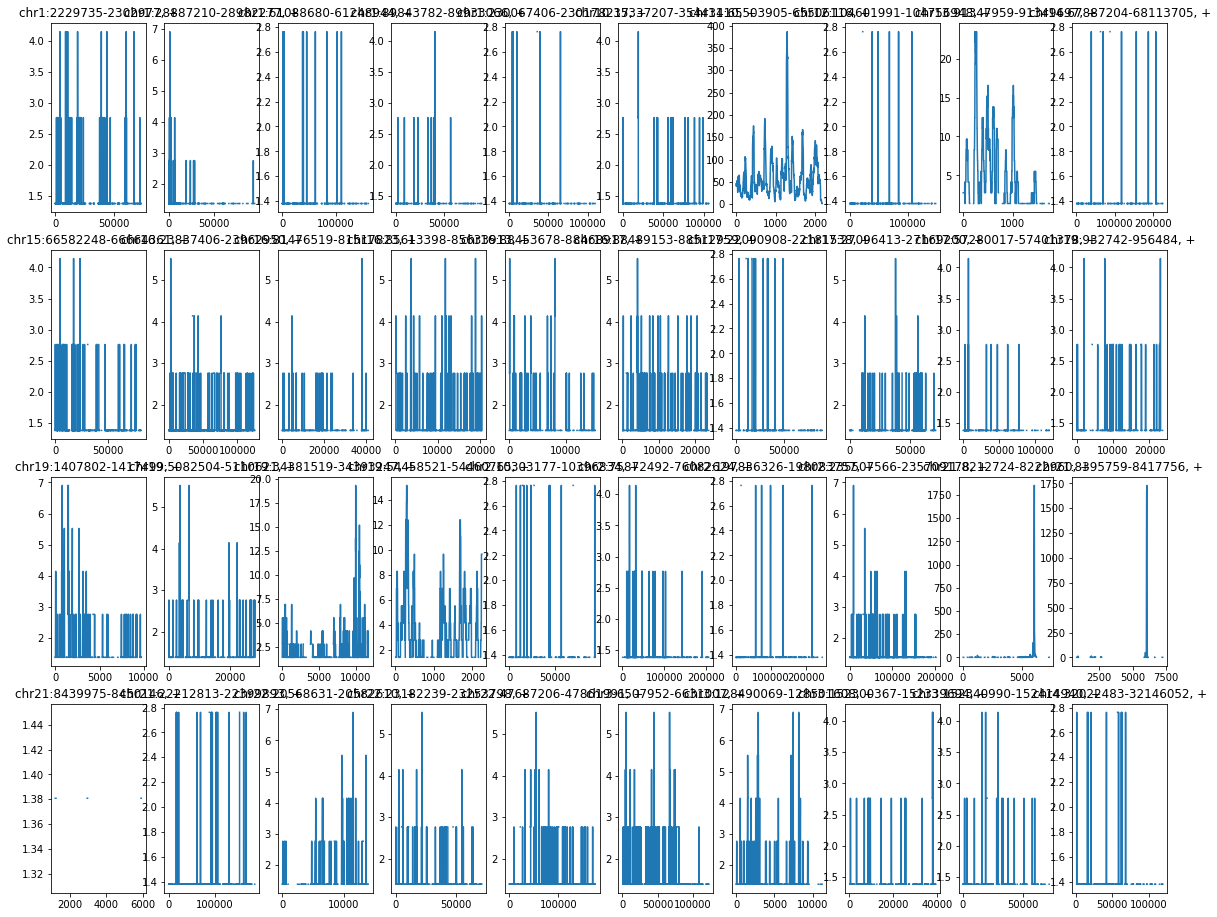

In [29]:

key_transcript_rps11 = BedTool('/home/hsher/projects/RPS11.key_transcript')
good = filter_key_transcript(key_transcript_rps11, RPS11)
plot_waveform(good, RPS11, sharex = False)

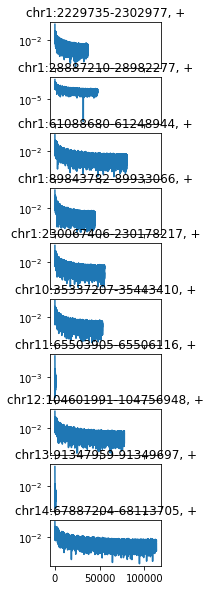

In [30]:
plot_spectral(good, RPS11)

chr1 630683 631073 -
chr1 2229735 2302977 +
chr1 28887210 28982277 +
chr1 54287371 54401860 -
chr1 61088680 61248944 +
chr1 89843782 89933066 +
chr1 89843782 89933066 +
chr1 173864304 173865470 -
chr1 230067406 230178217 +
chr1 246113804 246178777 -


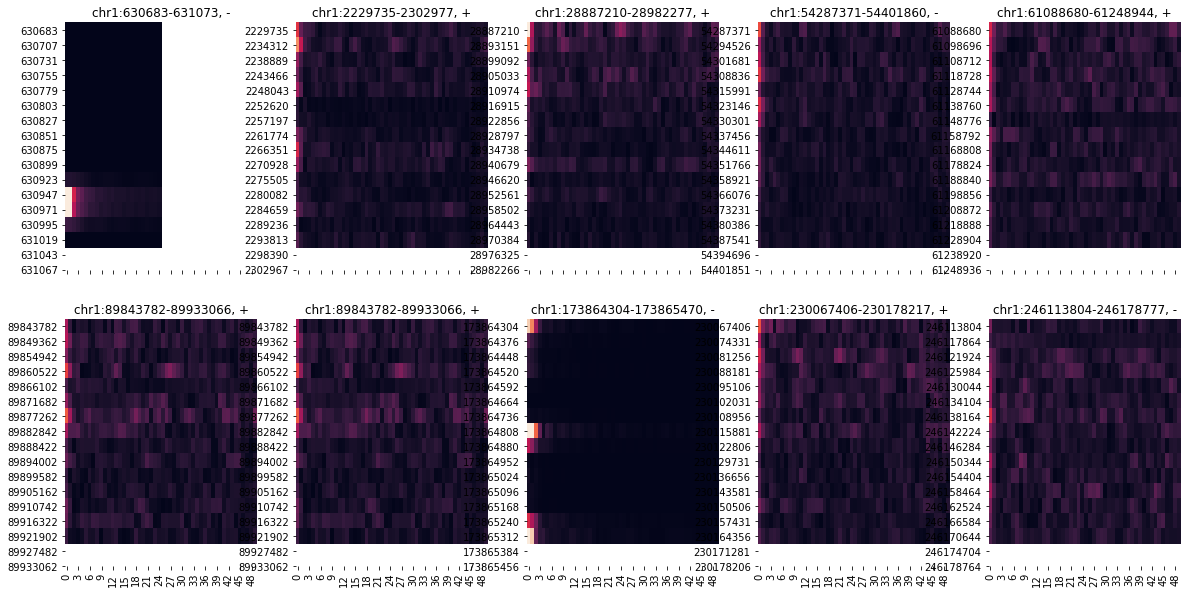

In [31]:
plot_spectrogram(key_transcript_rps11, RPS11, step = 'relative')

In [32]:
all_rps11, id_rps11 = get_spectrogram_unrolled(key_transcript_rps11, RPS11)

In [40]:
stack_rps3 = np.stack([a[:14,:5] for a in all_rps3])

In [41]:
stack_rps11 = np.stack([a[:14,:5] for a in all_rps11])

In [42]:
stack_hnrnpk = np.stack([a[:14,:5] for a in all_hnrnpk])

In [43]:
stack_hnrnpc = np.stack([a[:14,:5] for a in all_hnrnpc])

In [44]:
stack_rps3.shape

(621, 14, 5)

In [45]:
stack_rps11.shape

(128, 14, 5)

In [46]:
stack_hnrnpk.shape

(1487, 14, 5)

In [47]:
stack_hnrnpc.shape

(5000, 14, 5)

In [72]:
all_pca = np.concatenate([stack_rps3, stack_rps11, stack_hnrnpk[:1000, :, :], stack_hnrnpc[:1000, :, :]], axis = 0)

In [73]:
all_pca.shape

(2749, 14, 5)

In [74]:
all_pca = np.reshape(all_pca, [all_pca.shape[0], all_pca.shape[1]*all_pca.shape[2]])

In [75]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(np.nan_to_num(all_pca,0))

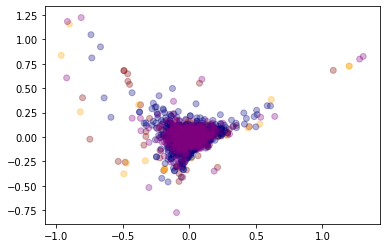

In [76]:
plt.scatter(x = reduced[:,0], y = reduced[:,1], color = ['maroon']*621+['orange']*128+['navy']*1000+['purple']*1000, alpha = 0.3)

In [77]:
import numpy as np
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(np.nan_to_num(all_pca,0))


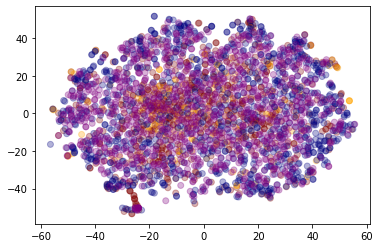

In [78]:
plt.scatter(x = X_embedded[:,0], y = X_embedded[:,1], color = ['maroon']*621+['orange']*128+['navy']*1000+['purple']*1000, alpha = 0.3)

In [82]:
ids = id_rps3 + id_rps11 + id_hnrnpk[:1000] + id_hnrnpc[:1000]

In [84]:
seq_length = [i[2]-i[1] for i in ids]

In [102]:
import matplotlib as mpl
import matplotlib.cm as cm

norm = mpl.colors.Normalize(vmin=min(seq_length), vmax=100000)
cmap = cm.Spectral

m = cm.ScalarMappable(norm=norm, cmap=cmap)
seq_length_to_color = [m.to_rgba(x) for x in seq_length]

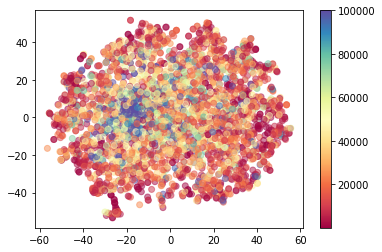

In [105]:
plt.scatter(x = X_embedded[:,0], y = X_embedded[:,1], color = seq_length_to_color, alpha = 0.5)
plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap))

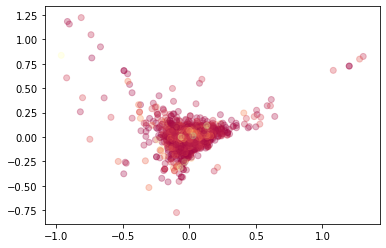

In [101]:
plt.scatter(x = reduced[:,0], y = reduced[:,1], color = seq_length_to_color, alpha = 0.3)

(array([757., 454., 323., 298., 189., 147., 109.,  99.,  68.,  70.,  52.,
         34.,  31.,  12.,  15.,  16.,  12.,  15.,   4.,   9.,   3.,   6.,
          3.,   2.,   5.,   3.,   5.,   2.,   0.,   1.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   2.]),
 array([7.3000000e+01, 1.0525680e+04, 2.0978360e+04, 3.1431040e+04,
        4.1883720e+04, 5.2336400e+04, 6.2789080e+04, 7.3241760e+04,
        8.3694440e+04, 9.4147120e+04, 1.0459980e+05, 1.1505248e+05,
        1.2550516e+05, 1.3595784e+05, 1.4641052e+05, 1.5686320e+05,
        1.6731588e+05, 1.7776856e+05, 1.8822124e+05, 1.9867392e+05,
        2.0912660e+05, 2.1957928e+05, 2.3003196e+05, 2.4048464e+05,
        2.5093732e+05, 2.6139000e+05, 2.7184268e+05, 2.8229536e+05,
        2.9274804e+05, 3.0320072e+05, 3.1365340e+05, 3.2410608e+05,
        3.3455876e+05, 3.4501144e+05, 3.5546412e+05, 3.6591680e+05,
        3.7636948e+05, 3.8682216e+05, 3.972748

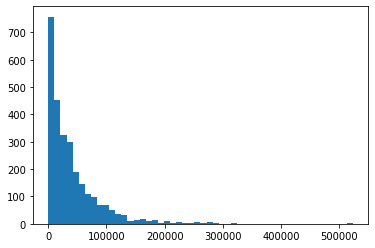

In [95]:
plt.hist(seq_length, bins = 50)